# 3-Programming Exercise 3:Neural Networks Coursera

## Manual Neural Networks with Logistic Regression

#  Introduction 

**The task realted to implement one-vs-all logistic regression and neural networks to recognize hand-written digits.**

### This Task is related to Coursera Machine Learning Course by Andrew NG, but implemnted in Python.

**Most text used in this notebook from ex3.pdf of Coursera**

**Look at ex3.pdf to get more intuition about the task**

**The task will be implemented in three ways and three notebooks and it all about one-vs-all logistic regression and Neural Networks**

- As manual code which pure code.
- Using Sklearn library
- Using Tensflow & Keras

### One-vs-all logistic regression and  Neural Networks  Multi-class Classification

## NOTE !!


There is a big different between Multi-Classifcation and Multi-Variables, the first one is about your input as features of each example of your data, but second is about the output you need to predict is one from multiple object like here we need to predict one number from 10 numbers from.

## Most of code is written to be clean and enhancing with functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat # because  the data is in mat extension
import scipy.optimize as opt


In [2]:
df_file = loadmat('csv_files/ex3data1.mat')
print("The columns of the file are\n", df_file.keys())

The columns of the file are
 dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


### Split the data to features & Labels

In [3]:
X = df_file['X']
y = df_file['y'].ravel()
m, n = X.shape
print("The shape of our features: ", X.shape)
print("The shape of our labels: ", y.shape)

The shape of our features:  (5000, 400)
The shape of our labels:  (5000,)


## Data Notes 
As we can see there is 400 features of each image that unrolled from 20 * 20 width and height of gratscale of each image and the number of example is 5000 image * 400 features which was 20 * 20 for each image.

Then the labels denote each of these images is 5000*1 for all images.

Each image has 400 features and each of these feature is a pixel of floating number that describe brightness at this pixel in the image.

In [4]:
print("One image features shape", X[0].shape)
print("label of first image", y[0])

One image features shape (400,)
label of first image 10


In [5]:
def init_2d_graphs(*colors):
    '''
        Just graph initialize in good way
    '''
    plt.style.use(colors) # color of your 2d graph
    plt.figure(figsize=(10,6)) # set the figure size
    return True

### Visualize some images from our dataset

**We need to unrolled 400 features to be 20 * 20 dimension for visualization these image**

In [6]:
# Take first 10 image and unrolled
X_10_images = np.random.permutation(X)[:21]
X_10_images = np.reshape(X_10_images, (-1, 20, 20))
print("Now our 10 images in shape:", X_10_images.shape)

Now our 10 images in shape: (21, 20, 20)


<Figure size 720x432 with 0 Axes>

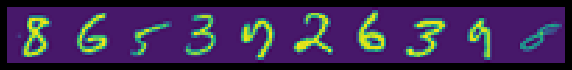

In [7]:
init_2d_graphs('dark_background' )
fig=plt.figure(figsize=(10, 8))
sample = np.random.randint( 0, X.shape[0] + 1, 10 )
data_plot = X[sample, : ].reshape( -1, 20 ).T # Make a 20X20 array and rotate
img = plt.imshow(data_plot)
plt.axis('off');

<Figure size 720x432 with 0 Axes>

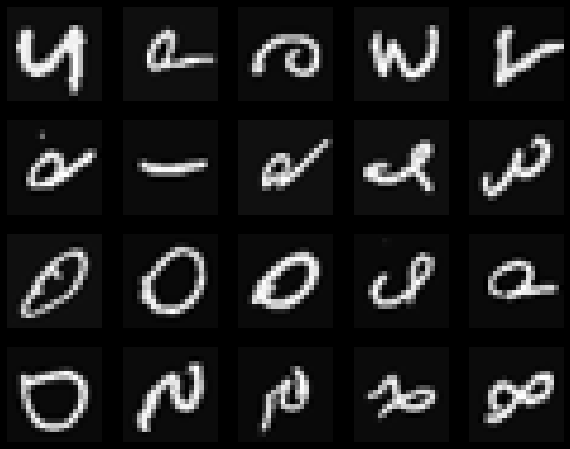

In [8]:
init_2d_graphs('dark_background' )
fig=plt.figure(figsize=(10, 8))
columns = 5
rows = 4
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i) # for each time add one image to the grid
    plt.imshow(X_10_images[i], cmap='gray') # as grayscale
    plt.axis('off')
plt.show()


## unregularized Vectorizing Logistic Regression

## Visualizing the sigmoid

In [9]:
def sigmoid(z):
    '''
    Argument:
        z = x*theta
    '''
# np.log is natural log of base 2 which is called ln
    g_z = 1/(1+np.exp(-z))
    return g_z

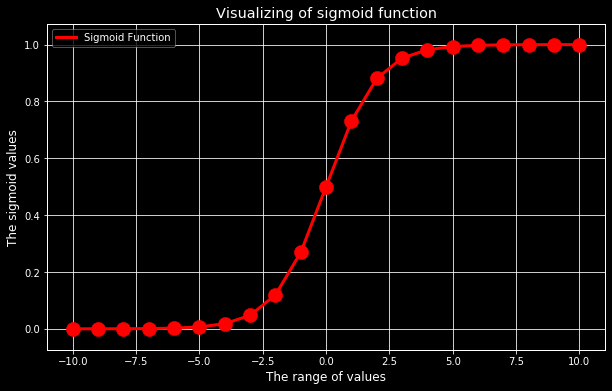

In [10]:
x = np.arange(-10, 11) #from -10 to 10, 11 because of 0 index
g_z = sigmoid(x)
init_2d_graphs('ggplot', 'dark_background' )
plt.scatter(x,g_z, s=200, c='red', marker='o')
plt.plot(x, g_z, 'red', label= 'Sigmoid Function',linewidth=3)
plt.xlabel('The range of values')
plt.ylabel('The sigmoid values')
plt.title('Visualizing of sigmoid function')
plt.legend()


### Vectorizing the cost function
it's not unusual to loop over each training example to get the result of multiplication, so we use the features of Math and Matrix to vectorize the process we deal with, and that help us a lot since now we deal with 400 feature not 3 or 4 feature so its waste of time to loop over each training example then loop over each feature, so some of these loops can be handle using Vectorization.

The unvectorize version was:

![alt text](images/cost_func_1.png "cost_func_1")

we can avoid the summation using transpose of y and transpose of(1-y) and by math Multiplication its will doing this for us.

## Gradient Descent

**Recall that the Gradient Descent vectorized implementation of classification before regularized part is :**

![alt text](images/another_vect.png "another_vect")

then we add regularized part which:
(lambad / m ) * thetas

In [11]:
def regularized_cost_function(thetas,x,y, lambad):
    '''
    Arguments:
        thetas the paramter we need to minimize of shape 10*401 400 of features + theta0 and 10 for different classes
        x the features of our dataset 5000*400
        m number of training examples 
        y is output we need to predict and its 10 different classes
    return:
        cost function as total squared cost of our predicted values h_x and the real values y
    '''
    m,n = x.shape # retrive number of training examples and features
    
   
    y_hat = sigmoid(np.matmul(x,thetas.T)) # hypothesis function
    
    equation_part1 = np.matmul(y.T, np.log(y_hat))
    equation_part2 = np.matmul((1-y).T, np.log(1-y_hat))
    
# get the cost function
    cost_function = (-1/m) * ( equation_part1+ equation_part2) # before regularized
    cost_function = np.sum(cost_function)
    cost_function += ((lambad/(2*m)) * np.sum(np.power(thetas[:, 1:],2))) # after regularized
    return cost_function

In [12]:
def regularized_gradient_descent(thetas,x,y, lambad):
    '''
    Arguments:
       thetas the paramter we need to minimize of shape 10*401
        x the features of our dataset 5000*401
        m number of training examples 
        y is output we need to predict
    return:
        new thetas value
    '''
    m,n = x.shape
    y_hat = sigmoid(np.matmul(x,thetas.T))
    grad = (1/m) * (np.matmul(x.T, (y_hat-y)))  # before regularized
    grad = grad.T
    grad[:, 1:] += ((lambad/m) * thetas[:, 1:])# after regularized
    return grad
    

### Vectorize hint !
here is I handle y from 5000 * 1 to be 5000 * 10 for each label that help a lot doing operations more quickly since every thing will be vectorized and no need to loop over each class.

In [13]:
def handle_output(y, num_labels):
    '''
    Argument:
        y = 5000 * 1
        num_of_labels = 10 in our case
   return Y which 5000 * 10 as mentioned in cell above
    '''
    Y = np.zeros((len(y), num_labels)) # initialize A with 0
    for i in range(num_labels):
        #at this step the dataset denote each number from 1-9 as it 
        # but with 0 its denote as 10 so we handle this case separately
        if i == 0:
            c = 10 # case of 10 denoted instead of should be 0
            Y[:, i] = np.where(y==c, 1, 0) # replace the 5000 row with 1 when its equal to i and othere with 0
        else:
            Y[:, i] = np.where(y==i, 1, 0)
    return Y

### OVA Approach
One Vise All approach work as separte each class from others so we have 10 classes so we will start with 1 of them and ignore all of otheres second take second class and ignore others and etc to last class

In [14]:
def one_vs_all_model(X, y, num_labels, l):
    '''
    Argument:
    X the features of all images 5000*400 for all examples 5000 and 400 features of each image
    y is our expected outppu of each example 5000*1
    num_labels is 10 different classes from 0-9 and 0 denotes as 10 in dataset and we handle that
    l required hyperparameter
    '''
    m, n = X.shape # retrive m examples and n features
    all_theta = np.zeros((num_labels, n + 1)) # create 10*401 weights all classes and its features
    
    X = np.hstack((np.ones((m, 1)), X)) # add column of 1 to X which x0=1
    Y = handle_output(y, len(np.unique(y))) # handle y instead of 5000*1 to be 5000*10 as OVA
    
    for i in range(500): # iterations of gradient Descent
        grad = regularized_gradient_descent(all_theta, X, Y, l)
        all_theta = all_theta - grad
    return all_theta



In [15]:
l = .9 # lambda regulation term
all_theta = one_vs_all_model(X, y, 10, l)

In [16]:
def predict_one_vs_all(all_theta, X):
    '''
    Argument:
        all_theta our theta paramters of shape 10*401
        X our image of shape 5000*401 and 401 which features of each image which was before 20*20 + x0
    '''
    m, n = X.shape # retrive the number of examples and features
    
    X = np.hstack((np.ones((m, 1)), X)) # add column 0
    
    y_hat = np.matmul(X, all_theta.T) # Hypothesis function
    print(y_hat.shape)
# line above return with 5000*10 matrix 5000 training example and for each of them we have 10 values
# these 10 values denote probability of the number being 0 or 1 or 2 and so on
# line above reduce these 5000*10 to be 5000*1 which get the maximum value from these 10 values and return it index
    p = np.argmax(y_hat, axis=1) # return the index of maximum values
    print("="*70)
    print(p.shape)
    p[p == 0] = 10 # handle case of p=0 to be 10 because we will comapre to real the dataset
    return p

In [17]:
# return the mean values between predicted and actual values y
pred = predict_one_vs_all(all_theta, X)
print ('Training Set Accuracy:', np.mean(pred == y) * 100)

(5000, 10)
(5000,)
Training Set Accuracy: 92.06


## Another Approach using Scipy

In [18]:
def regularized_gradient_model_using_scipy(thetas,x,y, lambad):
    '''
    Arguments:
        thetas the paramter we need to minimize of shape 10*401 400 of features + theta0 and 10 for different classes
        x the features of our dataset 5000*400
        m number of training examples 
        y is output we need to predict and its 10 different classes
    return:
        cost function as total squared cost of our predicted values h_x and the real values y
    '''
    m,n = x.shape # retrive number of training examples and features
    
   
    y_hat = sigmoid(np.matmul(x,thetas)) # hypothesis function
    
    equation_part1 = np.matmul(y.T, np.log(y_hat))
    equation_part2 = np.matmul((1-y).T, np.log(1-y_hat))
    
# get the cost function
    cost_function = (-1/m) * ( equation_part1+ equation_part2) # before regularized
    
#     cost_function = np.sum(cost_function, axis=1)
    cost_function += ((lambad/(2*m)) * np.sum(np.power(thetas[1:],2))) # after regularized
    
    grad = (1/m) * (np.matmul(x.T, (y_hat-y)))  # before regularized
#     grad = grad.T
    grad[1:] += ((lambad/m) * thetas[1:])# after regularized
    return cost_function, grad

In [19]:

def one_vs_all(X, y, num_labels, l):
    
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.hstack((np.ones((m, 1)), X))
    initial_theta = np.zeros(n + 1)
    
    for i in range(0, 10):
        label = 10 if i == 0 else i
        result = opt.minimize(fun=regularized_gradient_model_using_scipy, x0=initial_theta, args=(X, (y==label).astype(int), l),
                              method='TNC', jac=True)
        print ('one_vs_all(): label =', label, ', success =', result.success)
        all_theta[i, :] = result.x

    return all_theta

In [20]:
l = 0.1
all_theta = one_vs_all(X, y, 10, l)

one_vs_all(): label = 10 , success = True
one_vs_all(): label = 1 , success = True
one_vs_all(): label = 2 , success = True
one_vs_all(): label = 3 , success = True
one_vs_all(): label = 4 , success = True
one_vs_all(): label = 5 , success = True
one_vs_all(): label = 6 , success = True
one_vs_all(): label = 7 , success = True
one_vs_all(): label = 8 , success = True
one_vs_all(): label = 9 , success = True


In [21]:
# return the mean values between predicted and actual values y
pred = predict_one_vs_all(all_theta, X)
print ('Training Set Accuracy:', np.mean(pred == y) * 100)

(5000, 10)
(5000,)
Training Set Accuracy: 96.46000000000001


## Neural Networks Feed Forward propagation

All of code Above is acutally is implemented multi-class logistic re-gression to recognize handwritten digits, but However, logistic regression cannotform more complex hypotheses as it is only a linear classifier.

its transfer learning model because we have the weights are learned for us just we need to use these weights for predicting number using feed forward process.

The NN is just three layer and looks like:

![alt text](images/nn_archtiure.png "nn_archtiure")


In [22]:
df_file = loadmat('csv_files/ex3weights.mat')
print("The columns of the file are\n", df_file.keys())

The columns of the file are
 dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])


In [23]:
Theta1 = df_file['Theta1']
Theta2 = df_file['Theta2']

In [24]:
# Note that this NN actually is just 2 layer because we do not consider input layer as counted with us
print("The Weights of the first Layer which is hidden layer is: ", Theta1.shape)
print("The Weights of the second Layer which is output layer is: ", Theta2.shape)

The Weights of the first Layer which is hidden layer is:  (25, 401)
The Weights of the second Layer which is output layer is:  (10, 26)


## NOTE !!
First as we can see from above we have 5000 image each of them are 20 * 20 pixels after unrolling these to pass to the model its become 400 which called features so input layer will be 400 nerons but with bias unit we add as x0 its become 401 as you can see from **Theta1** weights second diemntion and the first hidden layer is just 25 nerons.

Second Last layer which is output has **Theta2** weights with 26 as second diemntion and this actually 25 nerons from previous layer and then when adding bais unit we add theta0 to our weights and finally we have 10 in first deimntion which are the ten different output numbers we need to predict.

In [25]:
def feed_forward_model(x, Theta1, Theta2):

    m,n = x.shape # number of training examples and number of features
    
    
        
    # first layer
    act_1 = x
    act_1 = np.hstack((np.ones((x.shape[0], 1)), act_1)) # add column of 1 to X which x0=1
    
    # Second layer
    Z_2 = np.matmul(act_1, Theta1.T)
    Act_2 = sigmoid(Z_2)
    Act_2 = np.hstack((np.ones((Act_2.shape[0], 1)), Act_2)) # add column of 1 to X which x0=1
    
#    # Third layer
    Z_3 =  np.matmul(Act_2, Theta2.T)
    Act_3 = sigmoid(Z_3)
    Act_3 = np.argmax(Act_3, axis=1)+1 # That because of 0 denotes as 10 in the dataset
    return Act_3
        

In [26]:
y_hat = feed_forward_model(X, Theta1, Theta2)

In [27]:
print ('Training Set Accuracy:', np.mean(y_hat == y) * 100)

Training Set Accuracy: 97.52
